<center>
    <h1 style="color: #3498db;">Árboles para la  Serie de Tiempo sobre el rendimiento del Atleta Iván</h1>
</center>


En muchas ocasiones los árboles no son buenos manejando las tendencia, por eso se sugiere
quitar la tendencia y analizar la serie sin tendencia.

<h2 style="color: #e67e22; text-align: left;">Librerías Necesarias</h2>

In [2]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn
import os

Datos sobre kilómetros recorridos por el Atleta Iván en su entrenamiento desde el 31 de diciembre de 2018 hasta 12 de febrero de 2024.

<h2 style="color: #e67e22; text-align: left;">Descripción de la serie de Tiempo</h2>

In [3]:
ruta = r"C:\Users\Lenovo\Desktop\shyni\Serie_Ivan.xlsx"

# Lee el archivo Excel
ivan = pd.read_excel(ruta,index_col=0)

# Muestra las primeras filas del DataFrame
print(ivan.head())
ivan.size

              KMS
DATE             
2018-12-31   17.3
2019-01-07   86.4
2019-01-14  107.3
2019-01-21  163.1
2019-01-28  153.5


268

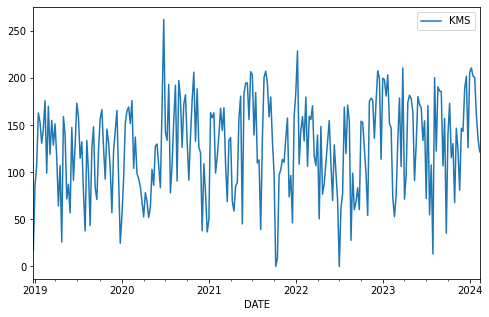

In [4]:
ivan.plot(figsize=(8,5))
pyplot.show()

In [5]:
print(ivan)

              KMS
DATE             
2018-12-31   17.3
2019-01-07   86.4
2019-01-14  107.3
2019-01-21  163.1
2019-01-28  153.5
...           ...
2024-01-15  202.2
2024-01-22  200.9
2024-01-29  160.7
2024-02-05  135.7
2024-02-12  121.8

[268 rows x 1 columns]


<h3 style="color: #e67e22; text-align: left;">Autocorrelación simple</h3>

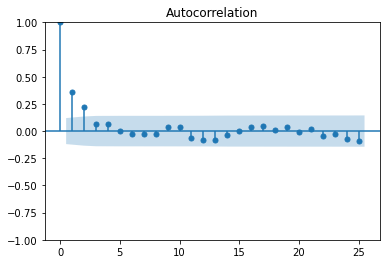

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(ivan)
plt.show()

<h3 style="color: #e67e22; text-align: left;">Autocorrelación parcial</h3>

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


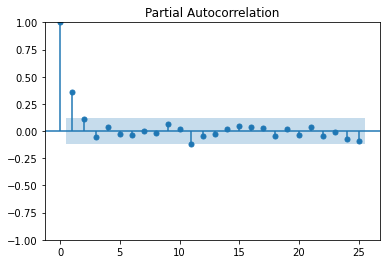

In [7]:
plot_pacf(ivan)
plt.show()

<h2 style="color: #e67e22; text-align: left;">Creación de componentes estacionales y variables rezagadas</h2>

In [26]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [19]:
ivan.index = pd.to_datetime(ivan.index)
ivan['Fecha'] = pd.to_datetime(ivan.index)

In [20]:
ivan.sort_index(inplace=True)

In [21]:
Indice=ivan['Fecha']

In [22]:
date_time=ivan['Fecha']
type(date_time)


pandas.core.series.Series

In [23]:
date_time.map(pd.Timestamp.timestamp) 

DATE
2018-12-31    1.546214e+09
2019-01-07    1.546819e+09
2019-01-14    1.547424e+09
2019-01-21    1.548029e+09
2019-01-28    1.548634e+09
                  ...     
2024-01-15    1.705277e+09
2024-01-22    1.705882e+09
2024-01-29    1.706486e+09
2024-02-05    1.707091e+09
2024-02-12    1.707696e+09
Name: Fecha, Length: 268, dtype: float64

In [24]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

DATE
2018-12-31    1.546214e+09
2019-01-07    1.546819e+09
2019-01-14    1.547424e+09
2019-01-21    1.548029e+09
2019-01-28    1.548634e+09
                  ...     
2024-01-15    1.705277e+09
2024-01-22    1.705882e+09
2024-01-29    1.706486e+09
2024-02-05    1.707091e+09
2024-02-12    1.707696e+09
Name: Fecha, Length: 268, dtype: float64

In [29]:
# Número de semanas a considerar para los retrasos de tiempo
semanas_totales = 2

for i in range(2, 0, -1):
    df1['t-'+str(i)] = ivan[['KMS']].shift(i)

# Imprimir el DataFrame resultante
print(df1)


              t-2    t-1
DATE                    
2018-12-31    NaN    NaN
2019-01-07    NaN   17.3
2019-01-14   17.3   86.4
2019-01-21   86.4  107.3
2019-01-28  107.3  163.1
...           ...    ...
2024-01-15  206.3  211.0
2024-01-22  211.0  202.2
2024-01-29  202.2  200.9
2024-02-05  200.9  160.7
2024-02-12  160.7  135.7

[268 rows x 2 columns]


In [30]:
# Create column t
df1['t'] = ivan[['KMS']].values
print(df1.head(10))

              t-2    t-1      t
DATE                           
2018-12-31    NaN    NaN   17.3
2019-01-07    NaN   17.3   86.4
2019-01-14   17.3   86.4  107.3
2019-01-21   86.4  107.3  163.1
2019-01-28  107.3  163.1  153.5
2019-02-04  163.1  153.5  131.0
2019-02-11  153.5  131.0  146.1
2019-02-18  131.0  146.1  176.2
2019-02-25  146.1  176.2   99.2
2019-03-04  176.2   99.2  170.2


In [31]:
# Periodos
anio = 365.25 * 24 * 60 * 60  # segundos en un año
mes = 30.44 * 24 * 60 * 60  # Segundos en un mes promedio

# Componentes estacionales mensuales
df1['Month sin'] = np.sin(timestamp_s * (2 * np.pi / mes))
df1['Month cos'] = np.cos(timestamp_s * (2 * np.pi / mes))

# Componentes estacionales anuales
df1['Year sin'] = np.sin(timestamp_s * (2 * np.pi / anio))
df1['Year cos'] = np.cos(timestamp_s * (2 * np.pi / anio))

In [32]:
# Nuevo df, eliminando los Nans
df1_ivan = df1[2:]
print(df1_ivan)
df1_ivan.size

              t-2    t-1      t  Month sin  Month cos  Year sin  Year cos
DATE                                                                     
2019-01-14   17.3   86.4  107.3   0.726534  -0.687131  0.217577  0.976043
2019-01-21   86.4  107.3  163.1  -0.590454  -0.807071  0.333249  0.942839
2019-01-28  107.3  163.1  153.5  -0.874831   0.484428  0.444096  0.895979
2019-02-04  163.1  153.5  131.0   0.370733   0.928739  0.548511  0.836144
2019-02-11  153.5  131.0  146.1   0.967943  -0.251168  0.644981  0.764198
...           ...    ...    ...        ...        ...       ...       ...
2024-01-15  206.3  211.0  202.2   0.636087  -0.771617  0.230151  0.973155
2024-01-22  211.0  202.2  200.9  -0.685630  -0.727950  0.345386  0.938461
2024-01-29  202.2  200.9  160.7  -0.808288   0.588787  0.455618  0.890175
2024-02-05  200.9  160.7  135.7   0.482622   0.875829  0.559252  0.828997
2024-02-12  160.7  135.7  121.8   0.929503  -0.368815  0.654787  0.755814

[266 rows x 7 columns]


1862

In [34]:
df1_ivan=df1_ivan[['Month sin','Month cos','Year sin','Year cos','t-2','t-1','t']]

skforecast  es una librería de python que permite "
Time series forecasting with scikit-learn regressors", la cual permiten desde la partición de los datos, y la cración del aprendizaje supervisado.Funciona bien con las funciones de sklearn. Ver https://joaquinamatrodrigo.github.io/skforecast/0.5.0/index.html.

In [35]:
df1_ivan.values

array([[  0.7265337 ,  -0.68713084,   0.21757661, ...,  17.3       ,
         86.4       , 107.3       ],
       [ -0.5904539 ,  -0.80707137,   0.33324939, ...,  86.4       ,
        107.3       , 163.1       ],
       [ -0.87483088,   0.48442845,   0.4440958 , ..., 107.3       ,
        163.1       , 153.5       ],
       ...,
       [ -0.80828842,   0.58878675,   0.45561828, ..., 202.2       ,
        200.9       , 160.7       ],
       [  0.48262166,   0.87582894,   0.55925232, ..., 200.9       ,
        160.7       , 135.7       ],
       [  0.92950268,  -0.36881535,   0.65478686, ..., 160.7       ,
        135.7       , 121.8       ]])

<h2 style="color: #e67e22; text-align: left;">Dividir los datos</h2>

In [36]:
# Split data

ivansplit = df1_ivan.values
# split into lagged variables and original time series
X1= ivansplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =ivansplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [37]:
print(X1)
print(y1)

[[  0.7265337   -0.68713084   0.21757661   0.97604325  17.3
   86.4       ]
 [ -0.5904539   -0.80707137   0.33324939   0.94283872  86.4
  107.3       ]
 [ -0.87483088   0.48442845   0.4440958    0.89597931 107.3
  163.1       ]
 ...
 [ -0.80828842   0.58878675   0.45561828   0.89017525 202.2
  200.9       ]
 [  0.48262166   0.87582894   0.55925232   0.82899749 200.9
  160.7       ]
 [  0.92950268  -0.36881535   0.65478686   0.75581358 160.7
  135.7       ]]
[1.073e+02 1.631e+02 1.535e+02 1.310e+02 1.461e+02 1.762e+02 9.920e+01
 1.702e+02 1.191e+02 1.553e+02 1.288e+02 1.515e+02 1.161e+02 6.440e+01
 1.072e+02 2.600e+01 1.594e+02 1.398e+02 7.170e+01 8.730e+01 5.690e+01
 1.477e+02 9.160e+01 1.282e+02 1.735e+02 1.586e+02 1.150e+02 1.325e+02
 7.870e+01 3.780e+01 1.339e+02 9.980e+01 4.350e+01 1.254e+02 1.484e+02
 8.360e+01 7.120e+01 1.246e+02 1.573e+02 1.667e+02 1.261e+02 9.280e+01
 1.459e+02 1.321e+02 1.041e+02 5.720e+01 1.225e+02 1.440e+02 1.657e+02
 9.300e+01 2.470e+01 5.430e+01 9.320e+01 

**Conjunto de entrenamiento (70%), validación (10%) y prueba (20%)** variable respuesta:

In [38]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + (Validation) + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

# Se debe adicionar en este caso una observación a algún conjunto de datos, en este caso es para el conjunto de validación

Complete Observations for Target after Supervised configuration: 266
186 26 53
Train + (Validation) + Test: 265


Se le suma 1 al conjunto de validación:

In [39]:
# Target Train-Validation-Test split(70-10-20)
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 266
Training Observations for Target: 186
Validation Observations for Target: 27
Test Observations for Target: 53


**Conjunto de entrenamiento (70%), validación (10%) y prueba (20%)**  variables rezagadas:

In [40]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))


Observations for Feature: 266
Training Observations for Feature: 186
Validation Observations for Feature: 27
Test Observations for Feature: 53


<h2 style="color: #e67e22; text-align: left;">Selección de la profundidad óptima del árbol</h2>

Selecciona la profundidad máxima: Hasta que todas las hojas sean puras.

**La profundidad (o depth):** es una medida que indica el número máximo de niveles que hay desde la raíz hasta una hoja en el árbol. Es una forma de cuantificar la complejidad del árbol y su capacidad para capturar patrones en los datos.

In [41]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor
decision_tree_ivan = DecisionTreeRegressor()  # max-depth not set
decision_tree_ivan.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_ivan.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_ivan.score(val_feature,val_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM sobre validación es:",(((decision_tree_ivan.predict(val_feature)-val_target)**2).mean()) )


Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -0.2594687077499873
el RECM sobre validación es: 3420.5481481481484


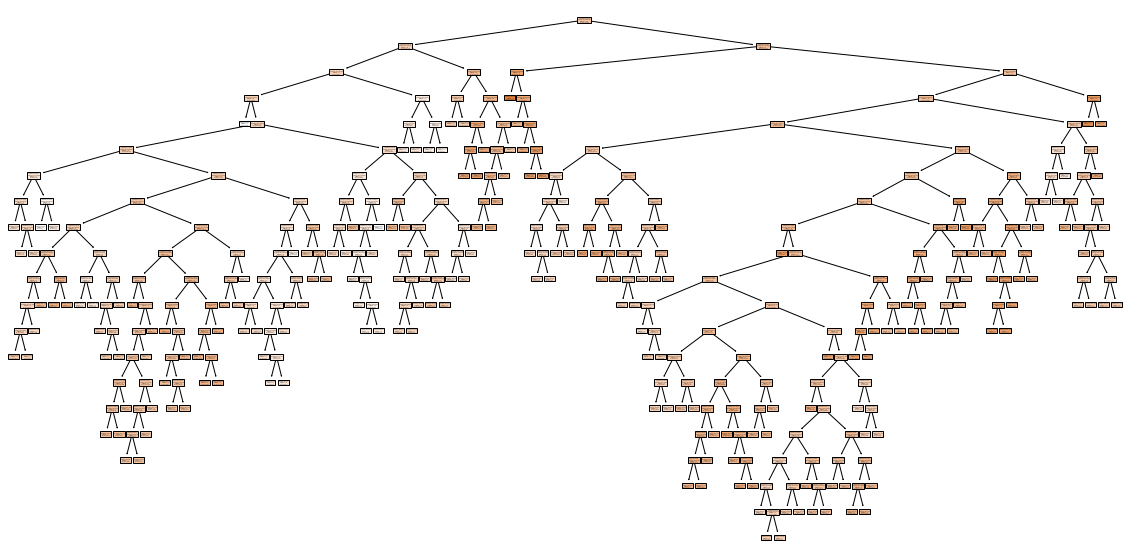

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura según sea necesario
plot_tree(decision_tree_ivan, filled=True, feature_names=['Feature 1', 'Feature 2','Feature 3','Feature 4', 'Feature 5', 'Feature 6'])
plt.show()

En esta primera parte se puede observar un gran sobreajuste, debido al R2 sobre el conjunto de entrenamiento y el R2 sobre el conjunto de validacion. Es por eso que ahora se intenta buscar la mejor profundidad

In [44]:
# Find the best Max Depth
# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,6,7,8,9,10,11]:
    # Create the tree and fit it
    decision_tree_ivan = DecisionTreeRegressor(max_depth=d)
    decision_tree_ivan.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_ivan.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_ivan.score(val_feature, val_target))  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_ivan.predict(val_feature),val_target, squared=False), '\n')



max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.272604210799
Coeficiente R2 sobre el conjunto de validación: 0.1611943728299804
el RECM sobre el conjunto de validación es: 47.72927425915862 

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.3459082058718833
Coeficiente R2 sobre el conjunto de validación: 0.10572087059915891
el RECM sobre el conjunto de validación es: 49.282270806106794 

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.40642238626346927
Coeficiente R2 sobre el conjunto de validación: 0.146032920832057
el RECM sobre el conjunto de validación es: 48.15869695262429 

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.4766539676791427
Coeficiente R2 sobre el conjunto de validación: 0.09597846247525332
el RECM sobre el conjunto de validación es: 49.5499877907818 

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.5459153135313635
Coeficiente R2 sobre el conjunto de validación: 0.1069926946149

Note que el RECM menor es con un depth de 2.

<h2 style="color: #e67e22; text-align: left;">Usando la penalización</h2>

El método de poda basado en el costo de complejidad ayuda a encontrar el equilibrio entre la complejidad del modelo y su rendimiento. A medida que se aumenta **ccp_alpha**, el árbol se simplifica, lo que puede reducir el sobreajuste.

In [45]:
path=decision_tree_ivan.cost_complexity_pruning_path(train_feature, train_target)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())
print(alphas.max())
div=25

[0.00000000e+00 2.68817204e-05 2.24014337e-04 4.30107527e-04
 5.26881720e-03 7.76881720e-03 1.95967742e-02 3.10752688e-02
 4.51881720e-02 4.74193548e-02 6.45430108e-02 6.72043011e-02
 6.99193548e-02 7.83870968e-02 8.13172043e-02 8.73387097e-02
 9.04301075e-02 9.32258065e-02 9.94086022e-02 1.14417563e-01
 1.17096774e-01 1.47204301e-01 1.67768817e-01 1.94220430e-01
 2.00053763e-01 2.87105735e-01 3.00080645e-01 3.53767921e-01
 3.67983871e-01 3.87096774e-01 4.00526882e-01 4.82688172e-01
 5.42258065e-01 5.65188172e-01 5.91836918e-01 6.24516129e-01
 6.29256272e-01 6.33405018e-01 6.92508961e-01 7.05483871e-01
 7.14220430e-01 7.95526882e-01 9.60241935e-01 9.68750000e-01
 1.23017921e+00 1.51758065e+00 1.53580645e+00 1.58733871e+00
 1.65333333e+00 1.65505556e+00 1.83068100e+00 1.93462545e+00
 2.27637097e+00 2.40495968e+00 2.97501075e+00 3.02474014e+00
 3.14035842e+00 3.53446573e+00 3.62451613e+00 3.68010753e+00
 3.70002688e+00 3.92717802e+00 4.05152001e+00 4.79072581e+00
 5.25172043e+00 6.301953

In [46]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import sklearn
import pandas as pd

# Supongamos que ya tienes alphas definidos, así como train_feature, train_target, val_feature, val_target

# Listas para almacenar los resultados
RMSE_train = []
RMSE_test = []

# Evaluar el modelo para cada valor de alpha
for alpha in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)
    
    # Predecir en los conjuntos de entrenamiento y validacion
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)
    
    # Calcular el RMSE y almacenar en las listas
    train_rmse = mean_squared_error(train_target, y_train_pred, squared=False)
    test_rmse = mean_squared_error(val_target, y_val_pred, squared=False)
    
    RMSE_train.append(train_rmse)
    RMSE_test.append(test_rmse)

# Convertir los resultados a un DataFrame para fácil visualización
results = pd.DataFrame({
    'Alpha': alphas,
    'Train RMSE': RMSE_train,
    'Test RMSE': RMSE_test
})

# Imprimir el DataFrame
print(results)

# Encontrar el alpha que minimiza el RMSE en los conjuntos de entrenamiento y prueba
optimal_alpha_train = alphas[np.argmin(RMSE_train)]
optimal_alpha_test = alphas[np.argmin(RMSE_test)]

print(f"El alpha óptimo para el conjunto de prueba es: {optimal_alpha_test:.3f}")


          Alpha  Train RMSE  Test RMSE
0      0.000000    0.000000  68.418443
1      0.000027    0.007332  63.608911
2      0.000224    0.008980  64.460582
3      0.000430    0.023379  64.176542
4      0.005269    0.161034  62.409305
..          ...         ...        ...
102   51.565546   38.248803  47.547700
103   68.518099   35.984323  50.898690
104   90.451396   40.465566  47.729274
105  129.188040   41.568178  47.135071
106  394.027898   43.094100  49.613518

[107 rows x 3 columns]
El alpha óptimo para el conjunto de prueba es: 129.188


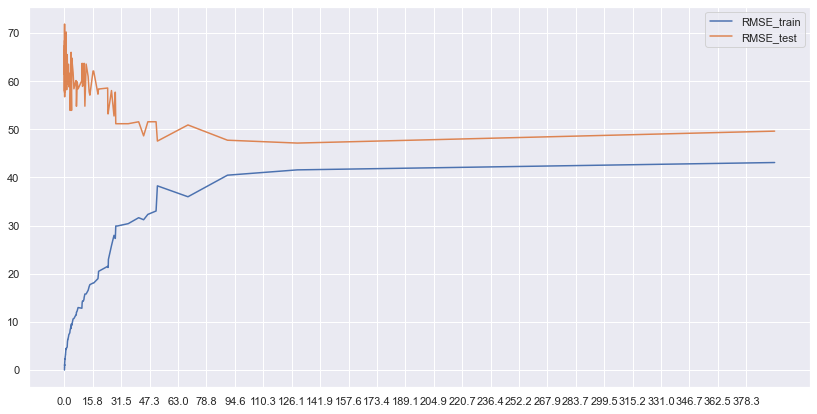

In [47]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))

sns.lineplot(y=RMSE_train,x=alphas,label="RMSE_train")

sns.lineplot(y=RMSE_test,x=alphas,label="RMSE_test")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div
))
plt.show()

En este gráfico, se espera ver que ambas líneas sigan una trayectoria similar, indicando que el ajuste del parámetro alpha afecta de manera similar tanto al rendimiento en entrenamiento como en prueba.

Note que le valor de $\alpha$ donde se minimiza el RMSE es  **129.188**. Vamos a tomar un valor de 40.966 para alpha y computaremos el árbol basado en ese valor de $\alpha$.

## <h2 style="color: #e67e22; text-align: left;">Juntar Entrenamiento y Validación</h2>

In [48]:
print(type(train_feature))
print(type(val_feature))

#######

print(type(train_target))
print(type(val_target))

####
print(train_feature.shape)
print(val_feature.shape)

#####

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(186, 6)
(27, 6)
(186,)
(27,)
(213, 6)
(213,)


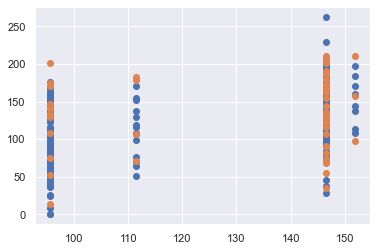

Raíz de la Pérdida cuadrática Entrenamiento: 41.65374329685942
Raíz de la Pérdida cuadrática Prueba: 51.09274274224783


In [49]:
# Plot predicted against actual values but with train + val

from matplotlib import pyplot as plt

# Use the best max_depth 

decision_tree_ivan = DecisionTreeRegressor(max_depth=2)  # fill in best max depth here
decision_tree_ivan.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction = decision_tree_ivan.predict(train_val_feature)
test_prediction = decision_tree_ivan.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction, train_val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, train_val_target,squared=False))

print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error(test_prediction, test_target,squared=False))


**De acuerdo a la penalización óptima que es 40.966:**

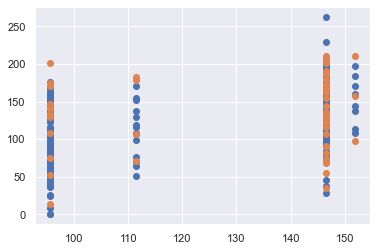

In [50]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_ivan_prun_mincost = DecisionTreeRegressor(ccp_alpha=129.188)  # fill in best max depth here
decision_tree_ivan_prun_mincost.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction_prun_mincost = decision_tree_ivan.predict(train_val_feature)
test_prediction_prun_mincost = decision_tree_ivan.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction_prun_mincost, train_val_target, label='train')  # blue
plt.scatter(test_prediction_prun_mincost, test_target, label='test')  # orange
plt.show()

**De acuerdo a la profundidad óptima del árbol que es 2:**

In [51]:
from sklearn import tree

listacaract=list(df1_ivan.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_ivan)
print(text_representation)

|--- feature_5 <= 113.90
|   |--- feature_4 <= 172.45
|   |   |--- value: [95.60]
|   |--- feature_4 >  172.45
|   |   |--- value: [151.85]
|--- feature_5 >  113.90
|   |--- feature_2 <= 0.91
|   |   |--- value: [146.48]
|   |--- feature_2 >  0.91
|   |   |--- value: [111.43]



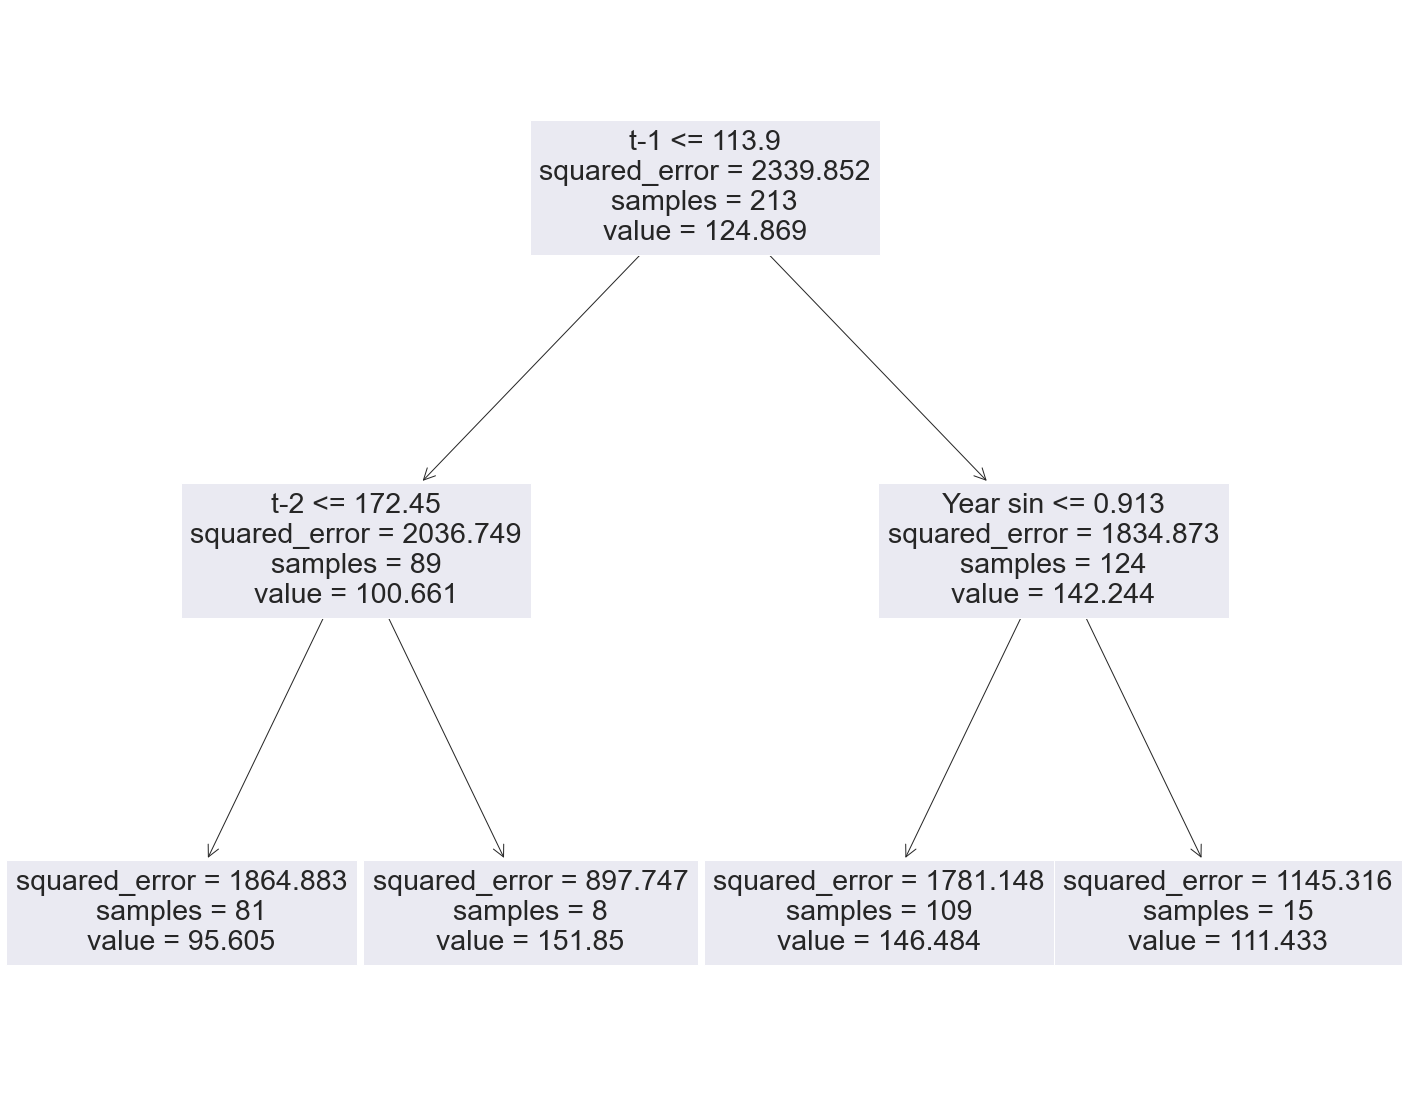

In [52]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_ivan, 
                   feature_names=listacaract)

Verficando las dimensiones del conjunto de prueba y del conjunto de entrenamiento para hacer las gráficas de comparación entre los verdaderos valores y sus pronósticos.

In [53]:
print(train_val_prediction.size)
print(train_val_target.size)
print(test_prediction.size)
print(test_target.size)

213
213
53
53


In [54]:
indicetrian_val_test=df1_ivan.index
print(indicetrian_val_test.size)  ###Tamaño del índice
indicetrain_val=indicetrian_val_test[0:213]
indicetest=indicetrian_val_test[213:266]

266


In [55]:
print(indicetrain_val.size)
print(indicetest.size)

213
53


In [56]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

266
266


**Observados vs predichos modelos con profundidad 3**

In [57]:
d = {'Observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
ObsvsPred.head(10)

,Observado,Predicción
DATE,,
2019-01-14,107.3,95.604963
2019-01-21,163.1,95.604963
2019-01-28,153.5,146.484404
2019-02-04,131.0,146.484404
2019-02-11,146.1,146.484404
2019-02-18,176.2,146.484404
2019-02-25,99.2,146.484404
2019-03-04,170.2,151.850000
2019-03-11,119.1,111.433333


**Gráfico Observados vs Predichos**

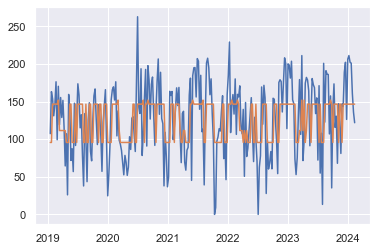

In [58]:
plt.plot(ObsvsPred)


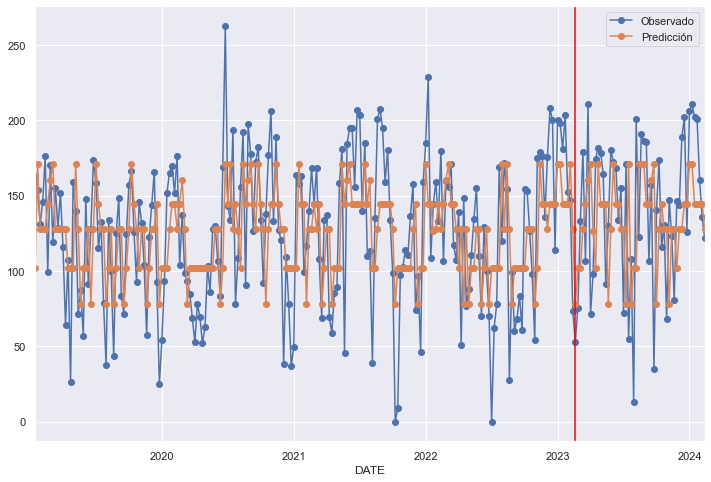

In [96]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_val_test[213].date(),color='red')

In [97]:
ObsvsPred

,Observado,Predicción
DATE,,
2019-01-21,163.1,101.710186
2019-01-28,153.5,171.100000
2019-02-04,131.0,128.123636
2019-02-11,146.1,128.123636
2019-02-18,176.2,128.123636
...,...,...
2024-01-15,202.2,144.713043
2024-01-22,200.9,144.713043
2024-01-29,160.7,144.713043


El **RMSE** sobre el conjunto de datos observados vs los predichos obtenido fue de: **52.20121791334682**.